In [1]:
# cd CrisisMMD_Dataset

In [2]:
pwd

'/notebooks/CrisisMMD_Dataset'

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from Precision_Module import Precision1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import aidrtokenize
from sklearn.metrics import classification_report

In [6]:
path = Path('/notebooks/CrisisMMD_Dataset')
# path.ls()

In [7]:
path_img = path/'data_image'

In [8]:
# import tarfile
# zf = tarfile.open("CrisisMMD_v2.tar.gz")
# zf.extractall()

In [9]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [10]:
data_human_image_file = 'new_task_humanitarian_text_img_agreed_lab_human_data.tsv'
test_data_human_image_file = 'new_task_humanitarian_text_img_agreed_lab_test_data.tsv' 

In [11]:
if data_human_image_file and test_data_human_image_file in path.ls():
    data_human_image_file = pd.read_csv('new_task_humanitarian_text_img_agreed_lab_human_data.tsv',delimiter='\t',encoding='utf-8')
    test_human_image_file = pd.read_csv('task_humanitarian_text_img_agreed_lab_test_data.tsv',delimiter='\t',encoding='utf-8')
else:
    train_human_image=pd.read_csv('task_humanitarian_text_img_agreed_lab_train.tsv',delimiter='\t',encoding='utf-8')
    test_human_image=pd.read_csv('task_humanitarian_text_img_agreed_lab_test.tsv',delimiter='\t',encoding='utf-8')
    dev_human_image=pd.read_csv('task_humanitarian_text_img_agreed_lab_dev.tsv',delimiter='\t',encoding='utf-8')
    
    train_human_image['tweet_text']=train_human_image['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    dev_human_image['tweet_text']=dev_human_image['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    test_human_image['tweet_text']=test_human_image['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    
    train_human_image['tweet_text'] = train_human_image['tweet_text'].apply(lambda x:clean_ascii(x))
    dev_human_image['tweet_text'] = dev_human_image['tweet_text'].apply(lambda x:clean_ascii(x))
    test_human_image['tweet_text'] = test_human_image['tweet_text'].apply(lambda x:clean_ascii(x))
    
    train_human_image['is_valid'] = False
    dev_human_image['is_valid'] = True
    test_human_image['is_valid'] = False 

    train_human_image['is_test'] = False
    dev_human_image['is_test'] = False
    test_human_image['is_test'] = True
    
    data_human_image = pd.concat([train_human_image,dev_human_image],axis=0).reset_index()
    data_human_image = data_human_image.drop(['index'],axis=1)
    
    test_data_human_image = pd.concat([train_human_image,test_human_image],axis=0).reset_index()
    test_data_human_image = test_data_human_image.drop(['index'],axis=1)
    
    data_human_image.to_csv('new_task_humanitarian_text_img_agreed_lab_human_data.tsv',encoding='utf-8')
    test_data_human_image.to_csv('new_task_humanitarian_text_img_agreed_lab_test_data.tsv',encoding='utf-8')

In [12]:
print(f"shape of data: {data_human_image.shape}\n")
print(data_human_image['is_valid'].value_counts())
print("="*50)
print(f"shape of test data: {test_data_human_image.shape}\n")
print(test_data_human_image['is_test'].value_counts())

shape of data: (7124, 11)

False    6126
True      998
Name: is_valid, dtype: int64
shape of test data: (7081, 11)

False    6126
True      955
Name: is_test, dtype: int64


In [13]:
data_human_image.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
3,california_wildfires,917815040962695168,917815040962695168_2,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
4,california_wildfires,917828283047260161,917828283047260161_0,why california wildfires are worse in the fall,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,other_relevant_information,Positive,False,False


In [14]:
test_data_human_image.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
3,california_wildfires,917815040962695168,917815040962695168_2,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive,False,False
4,california_wildfires,917828283047260161,917828283047260161_0,why california wildfires are worse in the fall,data_image/california_wildfires/10_10_2017/917...,other_relevant_information,other_relevant_information,other_relevant_information,Positive,False,False


In [15]:
tfms = get_transforms()

In [16]:
test_data_img = (ImageList.from_df(test_data_human_image,path,cols='image')
        #Where to find the data? -> in planet 'train' folder
        .split_from_df(col='is_test')
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(cols='label_image')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .transform(tfms, size=224)
        #Data augmentation? -> use tfms with a size of 128
        .databunch()
        .normalize(imagenet_stats))                          
        #Finally -> use the defaults for conversion to databunch

In [17]:
data_img = (ImageList.from_df(data_human_image,path,cols='image')
        #Where to find the data? -> in planet 'train' folder
        .split_from_df(col='is_valid')
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_df(cols='label_image')
        #How to label? -> use the second column of the csv file and split the tags by ' '
        .add_test(test_data_img.valid_ds.x)
        .transform(tfms, size=224)
        #Data augmentation? -> use tfms with a size of 128
        .databunch()
        .normalize(imagenet_stats))                          
        #Finally -> use the defaults for conversion to databunch

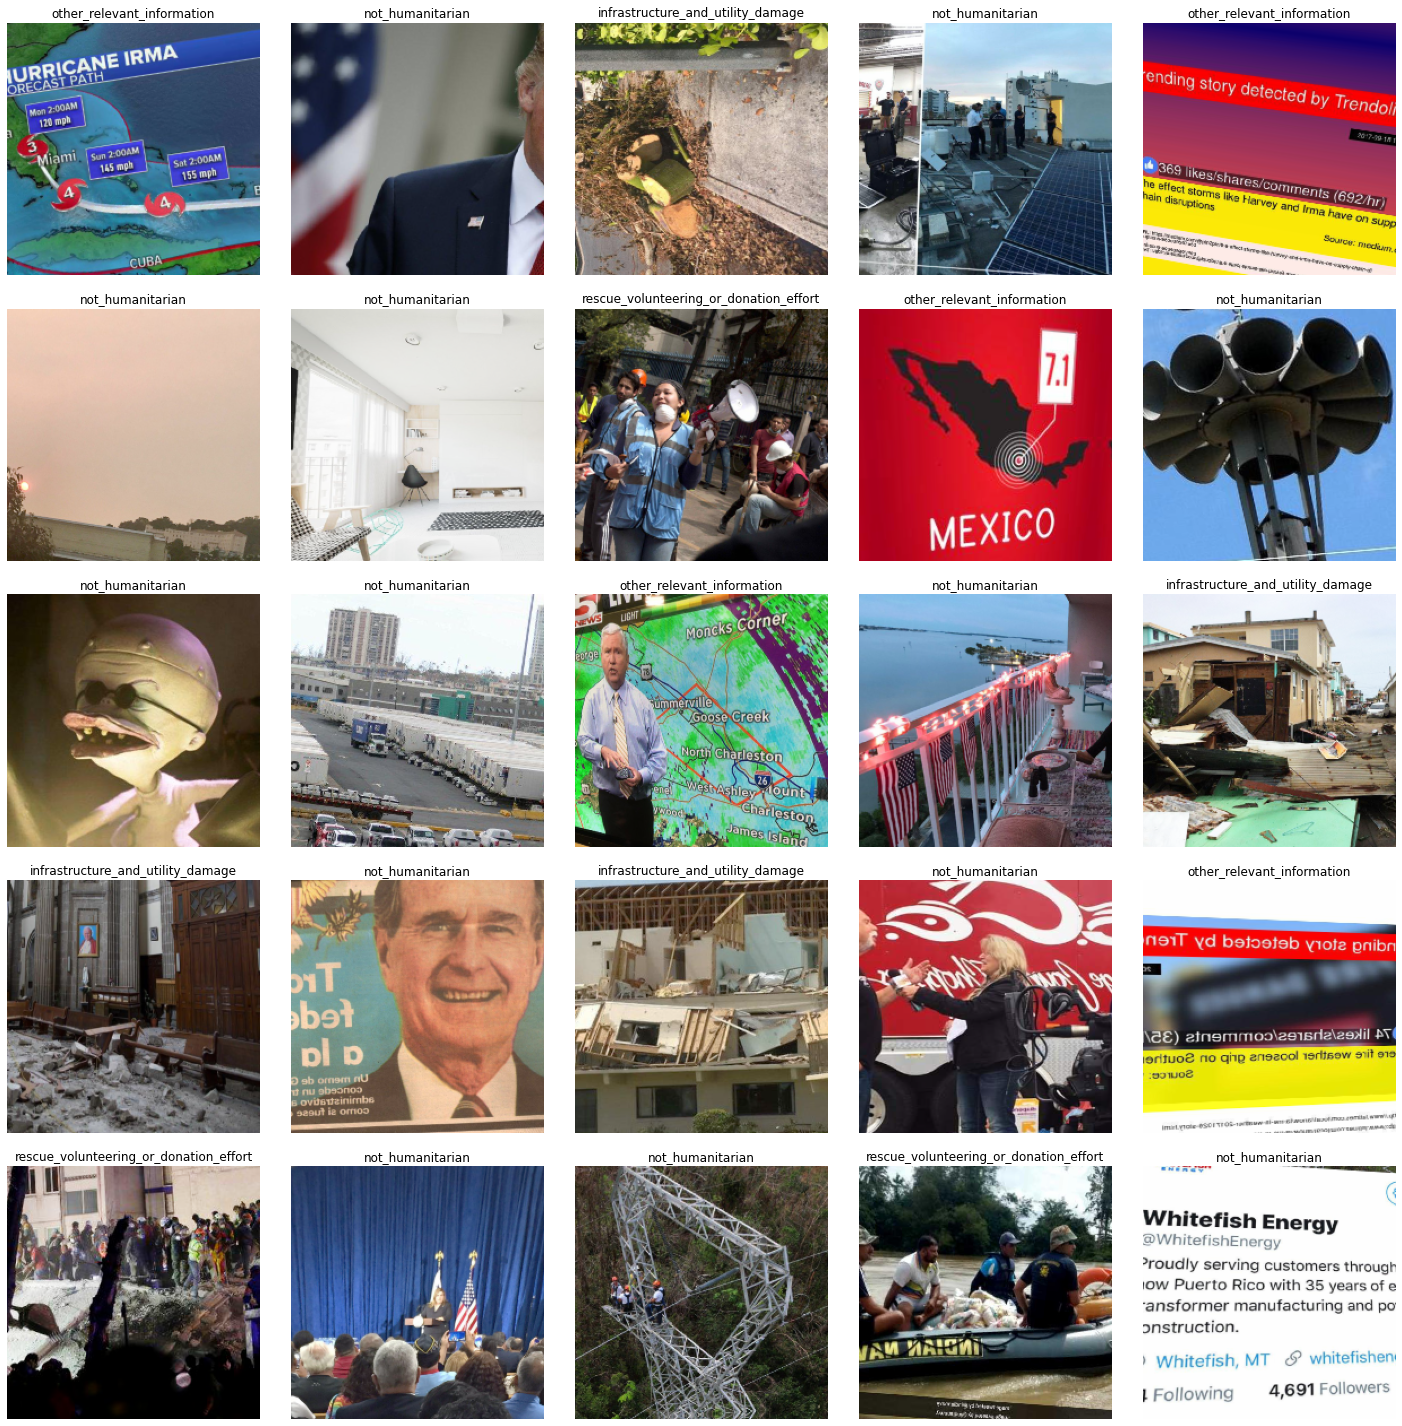

In [18]:
data_img.show_batch()

In [24]:
arch = models.resnet50
learn_img = cnn_learner(data_img, arch, metrics=[accuracy,Precision1(average='macro'),
                Precision1(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='valid_loss', min_delta=0.01, patience=3),
               partial(SaveModelCallback,every='improvement', monitor='valid_loss', name='best'),
               partial(ReduceLROnPlateauCallback,monitor='valid_loss', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]            
            )

In [22]:
learn_img.lr_find()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


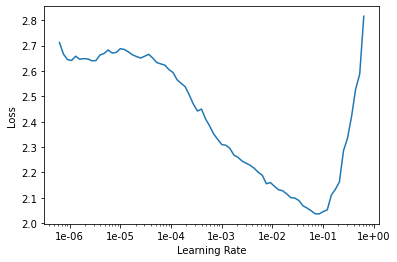

In [23]:
learn_img.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,1.278878,0.955320,0.751503,0.567936,0.751986,0.586611,0.751503,0.573937,0.749724,00:49
1,0.834297,0.729105,0.735471,0.575404,0.738277,0.555550,0.735471,0.554707,0.729067,00:51
2,0.649232,0.692631,0.774549,0.602373,0.772681,0.576194,0.774549,0.586765,0.769914,00:49
3,0.547410,0.635621,0.788577,0.626245,0.785616,0.584391,0.788577,0.602008,0.782666,00:49
4,0.491387,0.618252,0.798597,0.632133,0.793342,0.602035,0.798597,0.615378,0.793710,00:49


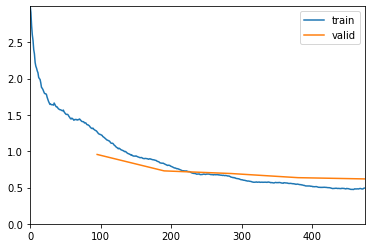

Better model found at epoch 0 with valid_loss value: 0.9553199410438538.
Better model found at epoch 1 with valid_loss value: 0.7291052937507629.
Better model found at epoch 2 with valid_loss value: 0.6926311254501343.
Better model found at epoch 3 with valid_loss value: 0.635621190071106.
Better model found at epoch 4 with valid_loss value: 0.618252158164978.


In [25]:
lr = 0.005
learn_img.fit_one_cycle(5, slice(lr))

In [26]:
learn_img.unfreeze()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


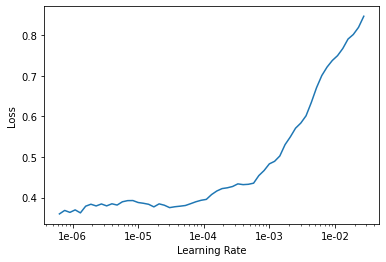

In [27]:
learn_img.lr_find()
learn_img.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision1,precision1,recall,recall,f_beta,f_beta,time
0,0.926923,0.907033,0.692385,0.534658,0.686461,0.437528,0.692385,0.461253,0.672405,00:51
1,0.810125,0.775846,0.705411,0.537890,0.697002,0.491180,0.705411,0.509247,0.695268,00:51
2,0.707327,0.728289,0.726453,0.566978,0.720675,0.522758,0.726453,0.534753,0.713811,00:51
3,0.664731,0.686433,0.746493,0.581580,0.744226,0.548377,0.746493,0.554355,0.735412,00:51
4,0.608284,0.668043,0.758517,0.594272,0.752074,0.559694,0.758517,0.571401,0.749245,00:51
5,0.581205,0.655622,0.764529,0.595584,0.756887,0.564277,0.764529,0.577656,0.757635,00:51
6,0.550330,0.641921,0.767535,0.597785,0.762276,0.570470,0.767535,0.581266,0.760774,00:51
7,0.523055,0.644127,0.759519,0.581420,0.754231,0.575306,0.759519,0.575446,0.753912,00:52
8,0.502395,0.642127,0.770541,0.593457,0.762061,0.581237,0.770541,0.585907,0.764669,00:51
9,0.491855,0.640247,0.766533,0.590888,0.759593,0.576279,0.766533,0.582201,0.761059,00:51


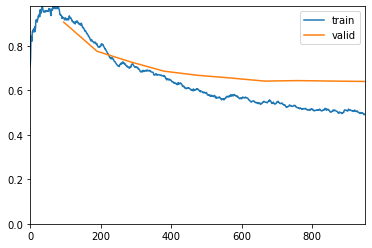

Better model found at epoch 0 with valid_loss value: 0.9070329666137695.
Better model found at epoch 1 with valid_loss value: 0.7758457064628601.
Better model found at epoch 2 with valid_loss value: 0.7282894849777222.
Better model found at epoch 3 with valid_loss value: 0.6864327788352966.
Better model found at epoch 4 with valid_loss value: 0.6680432558059692.
Better model found at epoch 5 with valid_loss value: 0.6556220054626465.
Better model found at epoch 6 with valid_loss value: 0.6419210433959961.
Epoch 7: reducing lr to 3.7651669210047406e-06
Epoch 8: reducing lr to 9.903873597305262e-07
Better model found at epoch 9 with valid_loss value: 0.6402474045753479.


In [29]:
learn_img.fit_one_cycle(10, slice(1e-5, 1e-4),wd=1e-1)

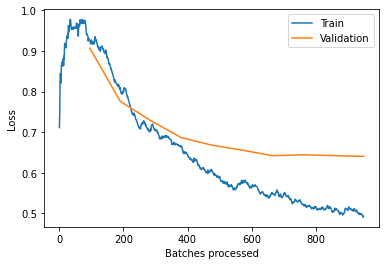

In [30]:
learn_img.recorder.plot_losses()

In [31]:
interp = ClassificationInterpretation.from_learner(learn_img)

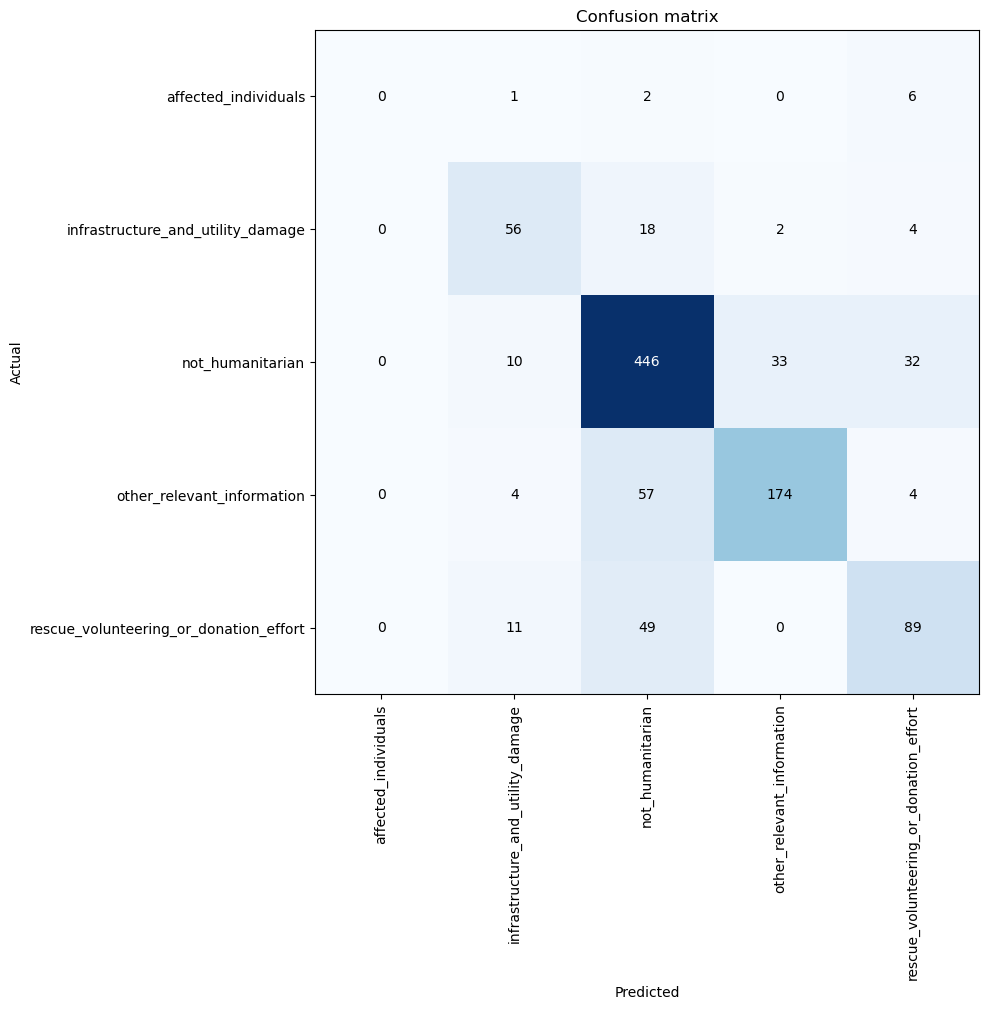

In [32]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [33]:
preds,y,losses = learn_img.get_preds(ds_type=DatasetType.Valid,with_loss=True)

y_preds = preds.argmax(1)

In [34]:
target_names = ['affected_individuals',
 'infrastructure_and_utility_damage',
 'not_humanitarian',
 'other_relevant_information',
 'rescue_volunteering_or_donation_effort']

print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.00      0.00      0.00         9
     infrastructure_and_utility_damage       0.68      0.70      0.69        80
                      not_humanitarian       0.78      0.86      0.82       521
            other_relevant_information       0.83      0.73      0.78       239
rescue_volunteering_or_donation_effort       0.66      0.60      0.63       149

                              accuracy                           0.77       998
                             macro avg       0.59      0.58      0.58       998
                          weighted avg       0.76      0.77      0.76       998



/opt/conda/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
learn_img.validate(test_data_img.valid_dl,metrics=[accuracy,Precision1(average='macro'),Precision1(average='weighted'),
                                                 Recall(average='macro'),Recall(average='weighted'),
                                                 FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)])

[0.57965,
 tensor(0.7937),
 tensor(0.6109),
 tensor(0.7880),
 tensor(0.5943),
 tensor(0.7937),
 tensor(0.5992),
 tensor(0.7866)]

In [36]:
preds,y,losses = learn_img.get_preds(ds_type=DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)
y = [test_data_img.valid_ds[i][1].data for i in range(len(test_data_img.valid_ds))]
print(classification_report(y, y_preds, target_names=target_names))

                                        precision    recall  f1-score   support

                  affected_individuals       0.00      0.00      0.00         9
     infrastructure_and_utility_damage       0.72      0.80      0.76        81
                      not_humanitarian       0.80      0.90      0.84       504
            other_relevant_information       0.90      0.74      0.81       235
rescue_volunteering_or_donation_effort       0.63      0.53      0.58       126

                              accuracy                           0.79       955
                             macro avg       0.61      0.59      0.60       955
                          weighted avg       0.79      0.79      0.79       955



/opt/conda/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
